In [14]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
%matplotlib inline

In [15]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
diamonds.shape

(53940, 11)

In [17]:
# How all categorical variables
print(diamonds['cut'].unique())
print(diamonds['color'].unique())
print(diamonds['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [18]:
# Transform categorical variables into binary variables
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
diamonds.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,...,0,0,1,0,0,1,0,0,0,0


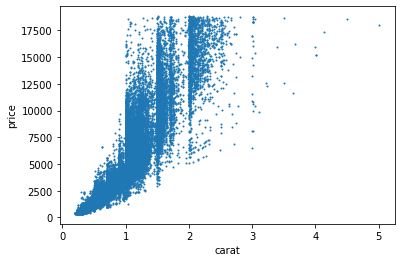

In [19]:
diamonds.plot.scatter(x='carat', y='price', s=1)

## Getting the train and test sets

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

In [24]:
#Scale (because all features different scale)
target_name = 'price'
robust_scaler = RobustScaler() # get features by dropping the price into X
X = diamonds.drop('price', axis=1) # scale to a common scale
X = robust_scaler.fit_transform(X) # get target by extracting the price col from the diamonds
y = diamonds[target_name] # produce the answers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # 80 for training

### Preparing a DataFrame for model analysis

In [30]:
# save the exavulation metrics for every model
models = pd.DataFrame(index=['train_mse', 'test_mse'], columns=['NULL', 'MLR', 'KNN', 'LASSO'])

## The NULL model: always predict the average of the target

In [32]:
y_pred_null = y_train.mean()
models.loc['train_mse', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_train.size), y_true=y_train)
models.loc['test_mse', 'NULL'] = mean_squared_error(y_pred=np.repeat(y_pred_null, y_test.size), y_true=y_test)

## A. Multiline Linear Regression

In [35]:
# Inport the estimator object
from sklearn.linear_model import LinearRegression
# Create an instance of the extimator
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train) # train the estimator, pass the data
# Evaluate the model
models.loc['train_mse', 'MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_train), y_true=y_train)
models.loc['test_mse', 'MLR'] = mean_squared_error(y_pred=linear_regression.predict(X_test), y_true=y_test)
# save in the dataframe the training mse and the testing mse. y_pres and y_true are the predictions and answers

## B. K-Nearest Neighbors Model

In [42]:
# Import the estimator object
from sklearn.neighbors import KNeighborsRegressor
# Create an instance of the estimator
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
# Use the training data to train the estimator
knn.fit(X_train, y_train)
# Evaluate the model
models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)
models.loc['test_mse', 'KNN'] = mean_squared_error(y_pred=knn.predict(X_test), y_true=y_test)

## C. Lasso

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
models.loc['train_mse', 'LASSO'] = mean_squared_error(y_pred=lasso.predict(X_train), y_true=y_train)
models.loc['test_mse', 'LASSO'] = mean_squared_error(y_pred=lasso.predict(X_test), y_true=y_test)

In [46]:
models

,NULL,MLR,KNN,LASSO
train_mse,1.59239e+07,1.26712e+06,0,1.26717e+06
test_mse,1.58811e+07,1.28657e+06,565834,1.28629e+06


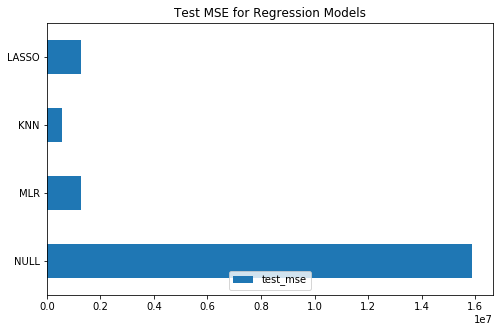

In [50]:
fig, ax = plt.subplots(figsize=(8, 5))
models.loc['test_mse'].plot(kind='barh', ax=ax)
ax.set_title('Test MSE for Regression Models')
ax.legend(loc=8, ncol=4)

Text(0, 0.5, 'Observed prices')

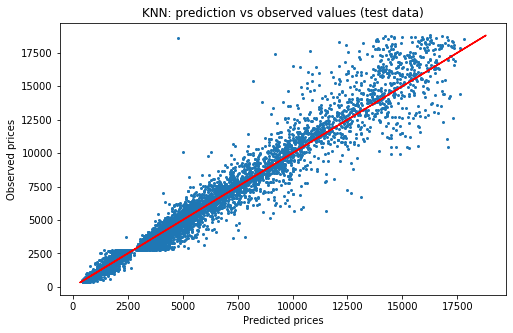

In [52]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(knn.predict(X_test), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: prediction vs observed values (test data)')
ax.set_xlabel('Predicted prices')
ax.set_ylabel('Observed prices')

## Using the best model to predict the price of a diamond

In [55]:
knn_final = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean', n_jobs=-1)
knn_final.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                    weights='distance')